# Capstone Project 2: Data Wrangling
The goal of this project is to predict the presence of heart disease – either coronary artery disease (CAD) or myocardial infarction (MI, a.k.a heart attacks) – in an individual given some of its medical and lifestyle features.

The work on this notebook corresponds to the Data Wrangling step of the project.

## Table of Contents
* [1 Import Relevant Packages](#1-Import-Relevant-Packages)
* [2 Load Data](#2-Load-Data)
* [3 Basic Description of Data](#3-Basic-Description-of-Data)
* [4 Choosing Columns to Keep](#4-Choosing-Columns-to-Keep)
    * [4.1 Columns Selection Process](#4.1-Column-Selection-Process)
    * [4.2 Dataframe Description After Keeping Relevant Columns](#4.2-Dataframe-Description-After-Keeping-Relevant-Columns)
* [5 Dealing with Missing Value Redundancy](#5-Dealing-with-Missing-Value-Redundancy)
* [6 Renaming Columns](#6-Renaming-Columns)
* [7 Dealing with Missing Values](#7-Dealing-with-Missing-Values)
    * [7.1 Proportion of Rows with Missing Values](#7.1-Proportion-of-Rows-with-Missing-Values)
    * [7.2 Visualizing Relationship Between Missing Value Entries](#Visualizing-Relationship-Between-Missing-Value-Entries)
        * [7.2.1 Bar Plot](#7.2.1-Bar-Plot)
        * [7.2.2 Nullity Matrix](#7.2.2-Nullity-Matrix)
        * [7.2.3 Heatmap](#7.2.3-Heatmap)
        * [7.2.4 Dendrogram](#7.2.4-Dendrogram)
        * [7.2.5 Count Plot for Features `Smoker_Cat` and `Heavy_Drinker`](#7.2.5-Count-Plot-for-Features-`Smoker_Cat`-and-`Heavy_Drinker`)
        * [7.2.6 Pearson's Chi-Squared Test for the Features `Smoker_Cat` and `Heavy_Drinker`](#7.2.6-Pearson's-Chi-Squared-Test-for-the-Features-`Smoker_Cat`-and-`Heavy_Drinker`)
    * [7.3 Removing Missing Values](#7.3-Removing-Missing-Values)
* [8 Description of Final Dataframe](#8-Description-of-Final-Dataframe)
* [Exporting Final Dataframe](#Exporting-Final-Dataframe)

## 1 Import Relevant Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import scipy.stats as ss

## 2 Load Data

In [2]:
'''Since the dataframe has over 400,000 rows, the kernel sometimes stalls when loading it. Reading the
dataframe in chunks of 100,000 rows and then concatenating them seems to prevent this.'''

#Name the path of the data and create a generator for the chunks.
path_in = '../Data/2015.zip'
df_gen = pd.read_csv(path_in, compression='zip', chunksize = 100000)

#Loop that concatenates the chunks. Output the raw data.
df_full = next(df_gen)
for d in df_gen:
    df_full = pd.concat([df_full, d])
df_full

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1.0,1.0,b'01292015',b'01',b'29',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0
1,1.0,1.0,b'01202015',b'01',b'20',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,2.0,2.0,3.0,3.0,4.0,2.0,2.0,NaN,NaN,2.0
2,1.0,1.0,b'02012015',b'02',b'01',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN
3,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,9.0
4,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441451,72.0,11.0,b'12162015',b'12',b'16',b'2015',1100.0,2.015005e+09,2.015005e+09,NaN,...,4.0,2.0,2.0,2.0,3.0,1.0,1.0,2.0,2.0,2.0
441452,72.0,11.0,b'12142015',b'12',b'14',b'2015',1100.0,2.015005e+09,2.015005e+09,NaN,...,2.0,2.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,1.0
441453,72.0,11.0,b'12232015',b'12',b'23',b'2015',1200.0,2.015005e+09,2.015005e+09,NaN,...,9.0,9.0,3.0,3.0,4.0,9.0,9.0,9.0,9.0,NaN
441454,72.0,11.0,b'12152015',b'12',b'15',b'2015',1100.0,2.015005e+09,2.015005e+09,NaN,...,4.0,2.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,2.0


## 3 Basic Description of Data
The data comprises over 400,000 rows, corresponding to survey respondents, and over 300 columns, corresponding to answers to survey questions. The majority of survey answers are number coded. For example, the column `BPHIGH4`, corresponding to the question "Have you ever been told by a doctor \[...\] that you have high blood pressure?", has six possible answers. A value of "1" corresponds to "Yes", a value of "2" corresponds to "Yes, but female and told only during pregnancy", a value of "3" corresponds to "No" and, similarly, other numbers correspond to other answers. The description of these numeric codes is found in pdf files provided by the CDC called "codebooks", which can be found in the "Documents" directory.

As can be seen, the questions and the answers can be very specific. However, some columns in the data frame are "calculated variables" that use the answers of combinations of different questions to arrive at a useful categorical label. For example, the column `_BMI5CAT` categorizes each survey participant into five different weight categories (normal weight, overweight, obese, etc.) by using the answers to questions about height and weight.

In [3]:
df_full.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1.0,1.0,b'01292015',b'01',b'29',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0
1,1.0,1.0,b'01202015',b'01',b'20',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,2.0,2.0,3.0,3.0,4.0,2.0,2.0,NaN,NaN,2.0
2,1.0,1.0,b'02012015',b'02',b'01',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN
3,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,9.0
4,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0


In [4]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441456 entries, 0 to 441455
Columns: 330 entries, _STATE to _AIDTST3
dtypes: float64(323), object(7)
memory usage: 1.1+ GB


## 4 Choosing Columns to Keep
Only the few columns that are perceived to be useful will be kept for the rest of the analysis. According to the Centers for Disease Control and Prevention (CDC) website, it is known that Coronary Artery Disease (CAD) has the following risk factors:
* Having hypertension
* Having high cholesterol
* Being overweight
* Using tobacco products
* Drinking alcohol excessively
* Being physically inactive
* Having diabetes

Therefore, we only keep the relatively few columns that are related to these risk factors. Most of the columns that will be kept will use calculated variables. The kept columns are:
* `_RFHLTH`: Adults with good or better health. "1" for "Good or better health", "2" for "Fair or poor health".
* `_RFHYPE5`: Adults who have been told have high blood pressure. "1" for "No", "2" for "Yes".
* `_RFCHOL`: Adults who have been told have high cholesterol. "1" for "No", "2" for "Yes".
* `_AGEG5YR`: Age group of the respondent. Ages are binned into five different categories. For example, "1" corresponds to "Age 18 to 24".
* `_BMI5CAT`: Weight category of respondent. There are five different categories. For example, "1" is "Underweight", "2" is "Normal weight", etc.
* `_PACAT1`: Physical activity category. For example, "1" is "Highly active", "2" is "Active", etc.
* `DIABETE3`: Adults that have been told have diabetes. There are six possible responses, but later these columns will be transformed into one that has "1" for "No" and "2" for "Yes".
* `SEX`: "1" for "Male", "2" for "Female".
* `_RACEGR3`: Race of respondents using five different categories.
* `_LLCPWT`: The final survey weight assigned to each respondent.
* `_MICHD`: The target feature. "1" if the respondent reported ever having coronary heart disease (CHD) or myocardial infarction (MI), a.k.a a heart attack.

### 4.1 Column Selection Process

In [5]:
#List of columns to keep.
cols_kept = ['_RFHLTH', '_RFHYPE5', '_RFCHOL', '_AGEG5YR', '_BMI5CAT', '_SMOKER3', '_RFDRHV5', \
          '_PACAT1', 'DIABETE3', 'SEX', '_RACEGR3', '_LLCPWT', '_MICHD']

#This part of the code makes sure that no typos were made when naming the columns by checking if each
#of the names on the previous list does indeed appear in the list of dataframe columns.
cols_wrong = [x for x in cols_kept if x not in df_full.columns]
if len(cols_wrong) == 0:
    print('No problems.')
else:
    print('These column names are not in the dataframe:')
    for x in wrong_cols:
        print(x)

#This is yet another check to make sure no typos were made when choosing the columns.
bool_list = [x in df_full.columns for x in cols_wrong]
assert all(bool_list)

No problems.


### 4.2 Dataframe Description After Keeping Relevant Columns

In [6]:
df = df_full[cols_kept]
df.head()

,_RFHLTH,_RFHYPE5,_RFCHOL,_AGEG5YR,_BMI5CAT,_SMOKER3,_RFDRHV5,_PACAT1,DIABETE3,SEX,_RACEGR3,_LLCPWT,_MICHD
0,2.0,2.0,2.0,9.0,4.0,3.0,1.0,4.0,3.0,2.0,1.0,341.384853,2.0
1,1.0,1.0,1.0,7.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,108.060903,2.0
2,2.0,1.0,2.0,11.0,2.0,9.0,9.0,9.0,3.0,2.0,1.0,255.264797,NaN
3,2.0,2.0,2.0,9.0,3.0,4.0,1.0,4.0,3.0,2.0,1.0,341.384853,2.0
4,2.0,1.0,1.0,9.0,2.0,4.0,1.0,4.0,3.0,2.0,1.0,258.682223,2.0


In [7]:
df.shape

(441456, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441456 entries, 0 to 441455
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   _RFHLTH   441456 non-null  float64
 1   _RFHYPE5  441456 non-null  float64
 2   _RFCHOL   382302 non-null  float64
 3   _AGEG5YR  441456 non-null  float64
 4   _BMI5CAT  405058 non-null  float64
 5   _SMOKER3  441456 non-null  float64
 6   _RFDRHV5  441456 non-null  float64
 7   _PACAT1   441456 non-null  float64
 8   DIABETE3  441449 non-null  float64
 9   SEX       441456 non-null  float64
 10  _RACEGR3  441456 non-null  float64
 11  _LLCPWT   441456 non-null  float64
 12  _MICHD    437514 non-null  float64
dtypes: float64(13)
memory usage: 43.8 MB


In [9]:
#The following function prints out the value counts for all columns in a dataframe.
def value_counts_cols(d_frame):
    '''Function accepting a pandas dataframe as input and prints out the value counts of all of its columns'''
    for c in d_frame.columns:
        print(d_frame[c].value_counts(dropna=False).sort_index(), '\n')

In [10]:
def value_counts_data_frame(d_frame):
    tuples = []
    counts = []
    '''Function accepting a pandas dataframe as input that returns a multi-indexed dataframe containing
    the value counts of the unique values of each column. The levels of the returned dataframe's index
    are the column names of the input dataframe and the unique values of said column.'''
    for c in d_frame.columns:
        s = d_frame[c].value_counts(dropna=False).sort_index()
        for i in s.index:
            tuples.append((c, round(i, 1)))
            counts.append(s[i])
    multi_index = pd.MultiIndex.from_tuples(tuples, names=['Columns', 'Value'])
    return pd.DataFrame(counts, index=multi_index, columns=['Counts'])

In [11]:
#Value counts for all columns.
value_counts_cols(df)

1.0    358072
2.0     82137
9.0      1247
Name: _RFHLTH, dtype: int64 

1.0    261901
2.0    178188
9.0      1367
Name: _RFHYPE5, dtype: int64 

1.0    218771
2.0    159970
9.0      3561
NaN     59154
Name: _RFCHOL, dtype: int64 

1.0     24192
2.0     19746
3.0     22917
4.0     24545
5.0     25942
6.0     30276
7.0     39881
8.0     46209
9.0     49794
10.0    49264
11.0    38362
12.0    28232
13.0    36760
14.0     5336
Name: _AGEG5YR, dtype: int64 

1.0      6721
2.0    131409
3.0    147004
4.0    119924
NaN     36398
Name: _BMI5CAT, dtype: int64 

1.0     43583
2.0     17998
3.0    122277
4.0    239608
9.0     17990
Name: _SMOKER3, dtype: int64 

1.0    393658
2.0     22065
9.0     25733
Name: _RFDRHV5, dtype: int64 

1.0    131374
2.0     71004
3.0     71142
4.0    112041
9.0     55895
Name: _PACAT1, dtype: int64 

1.0     57256
2.0      3608
3.0    372104
4.0      7690
7.0       598
9.0       193
NaN         7
Name: DIABETE3, dtype: int64 

1.0    186938
2.0    254518
Name: SEX,

## 5 Dealing with Missing Value Redundancy
In most of the columns that have been kept, a value of "9" corresponds to "No answer" (the "age" columns use instead a value of "14"). However, many of the entries have also been left blank. It, therefore, makes sense to change all number codes referring to "No answer" to NaN's in order to make dealing with null values easier.

In [12]:
#Three of the columns do not use a value of "9" for "No answer". They will therefore not form part of the loop 
#that replaces the value of "9" for "np.nan".
cols_no_age = [x for x in df.columns if x not in ['_AGEG5YR', 'DIABETE3', '_LLCPWT']]
for c in cols_no_age:
    df[c] = df[c].replace({9.0:np.nan})

#For the age columns, it is the value of "14" that corresponds to "No answer".
df['_AGEG5YR'] = df['_AGEG5YR'].replace({14.0:np.nan})

#For the diabetes columns, the "Yes" and "No", answers are further divided into categories. For example, "1"
#corresponds to "Yes, and not pregnant" and "2" corresponds to "Yes, but pregnant". We therefore relabel all "Yes"
#answers as "1", all "No" answers as "2", and "7" and "9" as "np.nan" since they refer to "No answer".
df['DIABETE3'] = df['DIABETE3'].replace({2.0:1.0, 3.0:2.0, 4.0:2.0, 7.0:np.nan, 9.0:np.nan})

/tmp/ipykernel_21287/4036607634.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c] = df[c].replace({9.0:np.nan})
/tmp/ipykernel_21287/4036607634.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['_AGEG5YR'] = df['_AGEG5YR'].replace({14.0:np.nan})
/tmp/ipykernel_21287/4036607634.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

In [13]:
#Check value counts again after relabeling.
value_counts_cols(df)

1.0    358072
2.0     82137
NaN      1247
Name: _RFHLTH, dtype: int64 

1.0    261901
2.0    178188
NaN      1367
Name: _RFHYPE5, dtype: int64 

1.0    218771
2.0    159970
NaN     62715
Name: _RFCHOL, dtype: int64 

1.0     24192
2.0     19746
3.0     22917
4.0     24545
5.0     25942
6.0     30276
7.0     39881
8.0     46209
9.0     49794
10.0    49264
11.0    38362
12.0    28232
13.0    36760
NaN      5336
Name: _AGEG5YR, dtype: int64 

1.0      6721
2.0    131409
3.0    147004
4.0    119924
NaN     36398
Name: _BMI5CAT, dtype: int64 

1.0     43583
2.0     17998
3.0    122277
4.0    239608
NaN     17990
Name: _SMOKER3, dtype: int64 

1.0    393658
2.0     22065
NaN     25733
Name: _RFDRHV5, dtype: int64 

1.0    131374
2.0     71004
3.0     71142
4.0    112041
NaN     55895
Name: _PACAT1, dtype: int64 

1.0     60864
2.0    379794
NaN       798
Name: DIABETE3, dtype: int64 

1.0    186938
2.0    254518
Name: SEX, dtype: int64 

1.0    336066
2.0     34346
3.0     19656
4.0      815

## 6 Renaming Columns
The column names are a bit obscure, so we will change them with more informative names.

In [14]:
col_names ={'_RFHLTH':'Health', '_RFHYPE5':'Hypertension', '_RFCHOL':'High_Cholesterol', \
            '_AGEG5YR':'Age_Group', '_BMI5CAT':'Overweight', '_SMOKER3':'Smoker_Cat', \
            '_RFDRHV5':'Heavy_Drinker', '_PACAT1':'Physical_Cat', 'DIABETE3':'Diabetes', \
            'SEX':'Sex', '_RACEGR3':'Race', '_LLCPWT':'Sample_Weights', '_MICHD':'Heart_Disease'}
df = df.rename(columns=col_names)
df

,Health,Hypertension,High_Cholesterol,Age_Group,Overweight,Smoker_Cat,Heavy_Drinker,Physical_Cat,Diabetes,Sex,Race,Sample_Weights,Heart_Disease
0,2.0,2.0,2.0,9.0,4.0,3.0,1.0,4.0,2.0,2.0,1.0,341.384853,2.0
1,1.0,1.0,1.0,7.0,3.0,1.0,1.0,2.0,2.0,2.0,1.0,108.060903,2.0
2,2.0,1.0,2.0,11.0,2.0,NaN,NaN,NaN,2.0,2.0,1.0,255.264797,NaN
3,2.0,2.0,2.0,9.0,3.0,4.0,1.0,4.0,2.0,2.0,1.0,341.384853,2.0
4,2.0,1.0,1.0,9.0,2.0,4.0,1.0,4.0,2.0,2.0,1.0,258.682223,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
441451,2.0,2.0,2.0,11.0,1.0,4.0,1.0,4.0,1.0,2.0,5.0,531.980410,2.0
441452,1.0,1.0,1.0,2.0,3.0,4.0,1.0,2.0,2.0,2.0,5.0,746.416599,2.0
441453,2.0,2.0,2.0,11.0,4.0,3.0,1.0,NaN,2.0,2.0,5.0,207.663634,2.0
441454,1.0,2.0,1.0,7.0,2.0,4.0,1.0,4.0,2.0,1.0,5.0,515.758894,2.0


## 7 Dealing with Missing Values

### 7.1 Proportion of Rows with Missing Values

In [15]:
#Total number of columns and number of columns with no missing values.
cols_tot = df.shape[0]
cols_no_miss = df.dropna().shape[0]

print('Total columns:', cols_tot, '\nTotal columns with no missing values:', cols_no_miss)
print('Fraction of columns with missing values:', round((cols_tot - cols_no_miss) / cols_tot, 2))

Total columns: 441456 
Total columns with no missing values: 301316
Fraction of columns with missing values: 0.32


If columns with missing values are dropped, we would lose about a third of the data. However, the dataset is vast; we would still keep a total of close to 300,000 entries. Before we decide on whether this is a good idea, however, we should further explore the data to make sure there are no obvious patterns related to the missing responses.

### 7.2 Visualizing Relationship Between Missing Value Entries

#### 7.2.1 Bar Plot

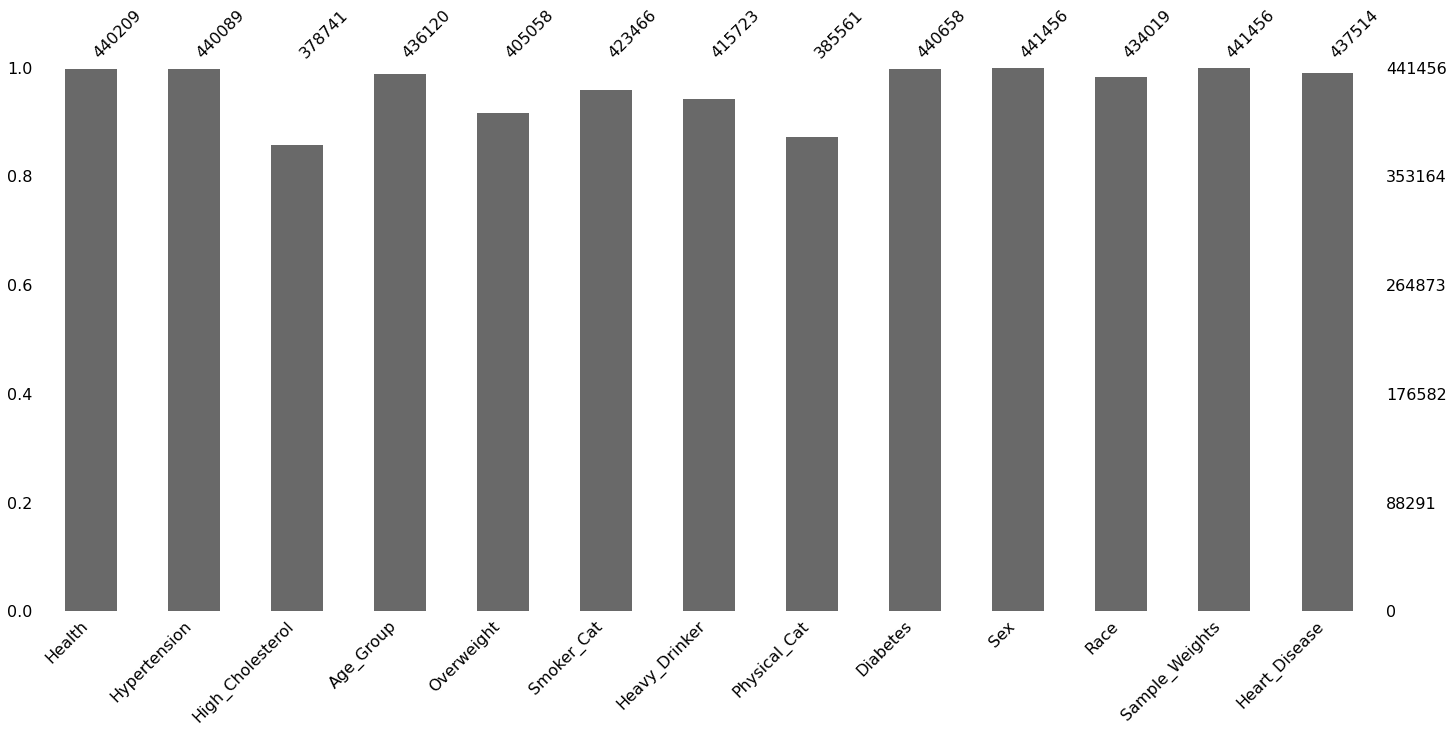

In [16]:
msno.bar(df)
plt.show()

#### 7.2.2 Nullity Matrix

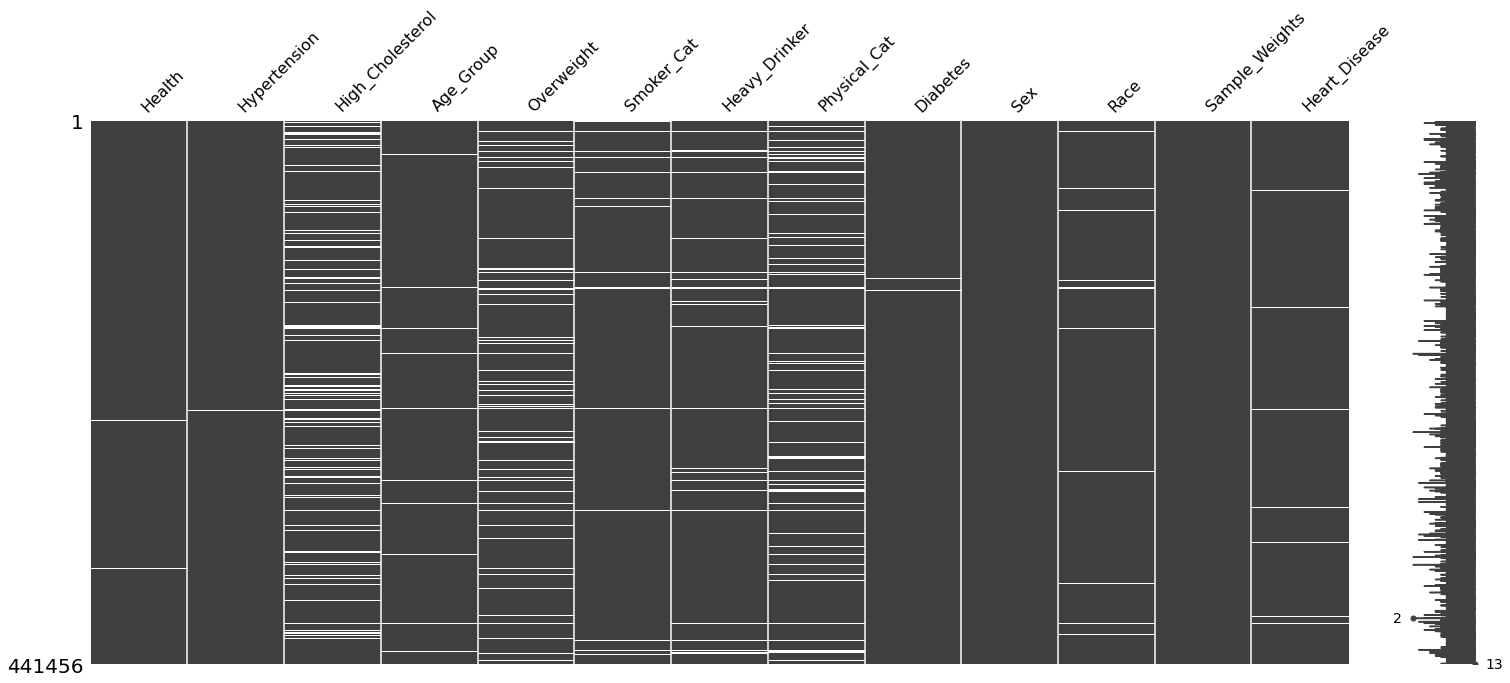

In [17]:
msno.matrix(df)
plt.show()

#### 7.2.3 Heatmap

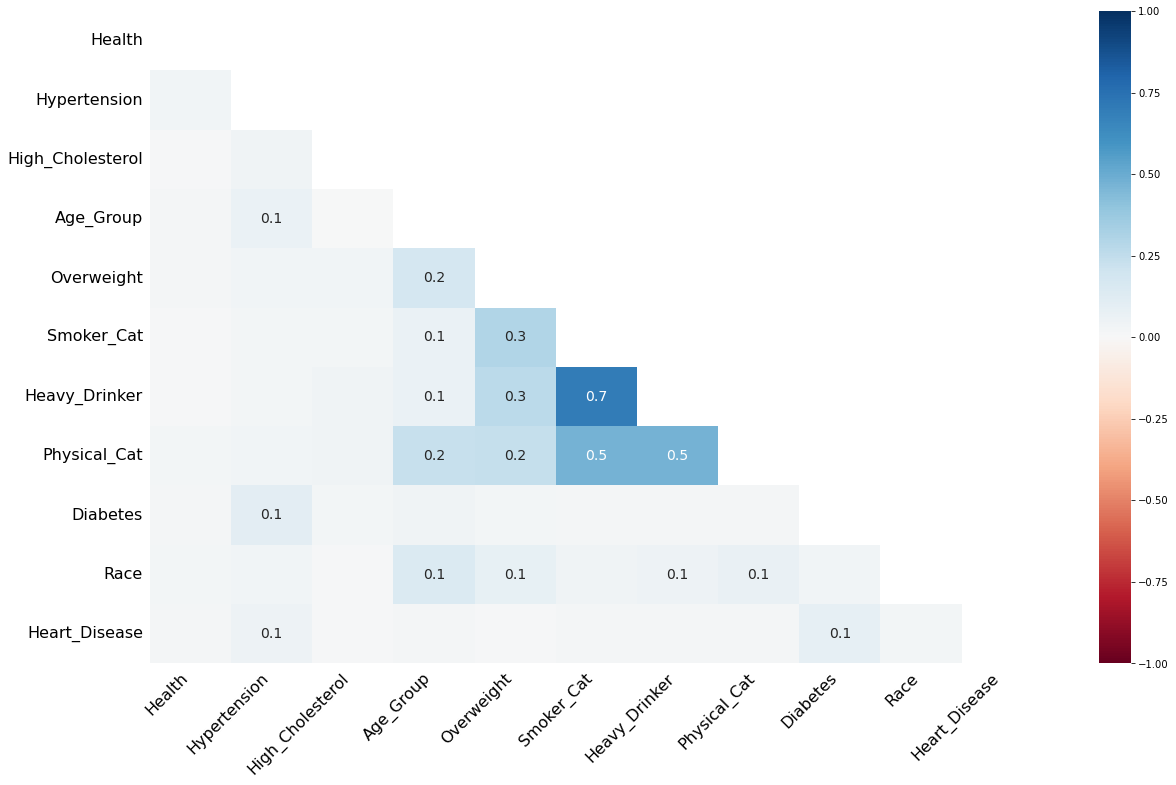

In [18]:
msno.heatmap(df)
plt.show()

#### 7.2.4 Dendrogram

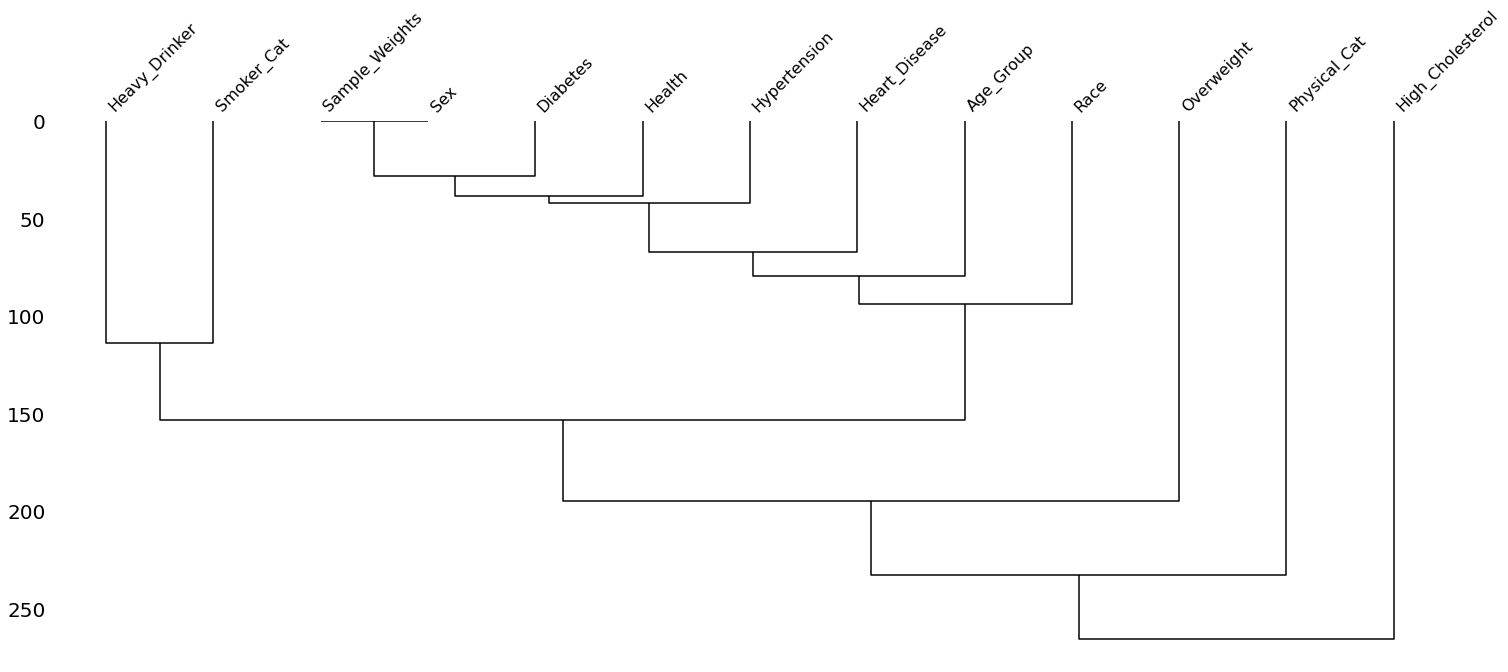

In [19]:
msno.dendrogram(df)
plt.show()

The missing values for the features `Heavy_Drinker` and `Smoker_Cat` seem to be highly correlated. Let's further explore the relationship between these two variables.

#### 7.2.5 Count Plot for Features `Smoker_Cat` and `Heavy_Drinker`

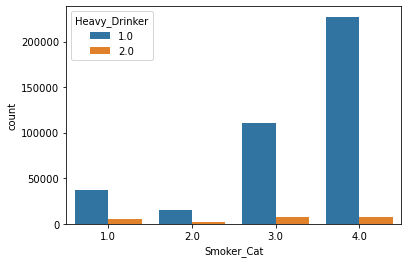

In [20]:
sns.countplot(x='Smoker_Cat', hue='Heavy_Drinker', data=df)
plt.show()

#### 7.2.6 Pearson's Chi-Squared Test for the Features `Smoker_Cat` and `Heavy_Drinker`

In [21]:
#Contingency table.
cont_tbl = pd.crosstab(df['Smoker_Cat'], df['Heavy_Drinker'])
cont_tbl

Heavy_Drinker,1.0,2.0
Smoker_Cat,,
1.0,37190,4843
2.0,15697,1572
3.0,111139,8003
4.0,227148,7539


In [22]:
sig_lvl = 0.95
chi2, p_val, dof, expected = ss.chi2_contingency(cont_tbl)
print(f'p-value: {p_val:.2f}', '\nWe', 'can' if p_val < 1 - sig_lvl else 'cannot', f'reject the null \
hypothesis of the two features not having a significant relation at the {sig_lvl * 100:.0f}% level.')

p-value: 0.00 
We can reject the null hypothesis of the two features not having a significant relation at the 95% level.


### 7.3 Removing Missing Values
When it comes to categorical data, the most common methods for dealing with missing values are to eliminate all rows with missing values or to impute the value that has the highest frequency. Since we are in a situation where the dataset is large even after removing the columns with missing values, we will adopt this method for now.

In [23]:
df = df.dropna()
df.head()

,Health,Hypertension,High_Cholesterol,Age_Group,Overweight,Smoker_Cat,Heavy_Drinker,Physical_Cat,Diabetes,Sex,Race,Sample_Weights,Heart_Disease
0,2.0,2.0,2.0,9.0,4.0,3.0,1.0,4.0,2.0,2.0,1.0,341.384853,2.0
1,1.0,1.0,1.0,7.0,3.0,1.0,1.0,2.0,2.0,2.0,1.0,108.060903,2.0
3,2.0,2.0,2.0,9.0,3.0,4.0,1.0,4.0,2.0,2.0,1.0,341.384853,2.0
4,2.0,1.0,1.0,9.0,2.0,4.0,1.0,4.0,2.0,2.0,1.0,258.682223,2.0
5,1.0,2.0,1.0,11.0,3.0,4.0,1.0,1.0,2.0,2.0,1.0,256.518591,2.0


## 8 Description of Final Dataframe

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301316 entries, 0 to 441455
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Health            301316 non-null  float64
 1   Hypertension      301316 non-null  float64
 2   High_Cholesterol  301316 non-null  float64
 3   Age_Group         301316 non-null  float64
 4   Overweight        301316 non-null  float64
 5   Smoker_Cat        301316 non-null  float64
 6   Heavy_Drinker     301316 non-null  float64
 7   Physical_Cat      301316 non-null  float64
 8   Diabetes          301316 non-null  float64
 9   Sex               301316 non-null  float64
 10  Race              301316 non-null  float64
 11  Sample_Weights    301316 non-null  float64
 12  Heart_Disease     301316 non-null  float64
dtypes: float64(13)
memory usage: 32.2 MB


In [25]:
df.isnull().sum()

Health              0
Hypertension        0
High_Cholesterol    0
Age_Group           0
Overweight          0
Smoker_Cat          0
Heavy_Drinker       0
Physical_Cat        0
Diabetes            0
Sex                 0
Race                0
Sample_Weights      0
Heart_Disease       0
dtype: int64

In [26]:
value_counts_cols(df)

1.0    245192
2.0     56124
Name: Health, dtype: int64 

1.0    169088
2.0    132228
Name: Hypertension, dtype: int64 

1.0    172245
2.0    129071
Name: High_Cholesterol, dtype: int64 

1.0      7552
2.0      8605
3.0     12191
4.0     15222
5.0     17687
6.0     21861
7.0     29556
8.0     35051
9.0     38624
10.0    38567
11.0    29593
12.0    21256
13.0    25551
Name: Age_Group, dtype: int64 

1.0      4170
2.0     92638
3.0    111025
4.0     93483
Name: Overweight, dtype: int64 

1.0     28344
2.0     11671
3.0     92890
4.0    168411
Name: Smoker_Cat, dtype: int64 

1.0    285338
2.0     15978
Name: Heavy_Drinker, dtype: int64 

1.0    107425
2.0     56432
3.0     54318
4.0     83141
Name: Physical_Cat, dtype: int64 

1.0     45459
2.0    255857
Name: Diabetes, dtype: int64 

1.0    128529
2.0    172787
Name: Sex, dtype: int64 

1.0    241648
2.0     21941
3.0     11769
4.0      5300
5.0     20658
Name: Race, dtype: int64 

1.180750        1
1.619610        1
1.767523        1
1.

## 9 Exporting Final Dataframe

In [27]:
path_out = '../Data/2015_clean.csv'
df.to_csv(path_out, index=False)